In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import os



In [3]:
dataset_path = os.listdir('C:\\Users\\hp\\OneDrive\\Desktop\\MYdataset\\train')

label_types = os.listdir('C:\\Users\\hp\\OneDrive\\Desktop\\MYdataset\\train')
print (label_types)  

['Back arching', 'Low hip mobility', 'Right']


In [4]:
rooms = []

for item in dataset_path:
 # Get all the file names
 all_rooms = os.listdir('C:\\Users\\hp\\OneDrive\\Desktop\\MYdataset\\train' + '/' +item)

 # Add them to the list
 for room in all_rooms:
    rooms.append((item, str('C:\\Users\\hp\\OneDrive\\Desktop\\MYdataset\\train' + '/' +item) + '/' + room))
    
# Build a dataframe        
train_df = pd.DataFrame(data=rooms, columns=['tag', 'video_name'])
print(train_df.head())
print(train_df.tail())


            tag                                         video_name
0  Back arching  C:\Users\hp\OneDrive\Desktop\MYdataset\train/B...
1  Back arching  C:\Users\hp\OneDrive\Desktop\MYdataset\train/B...
2  Back arching  C:\Users\hp\OneDrive\Desktop\MYdataset\train/B...
3  Back arching  C:\Users\hp\OneDrive\Desktop\MYdataset\train/B...
4  Back arching  C:\Users\hp\OneDrive\Desktop\MYdataset\train/B...
       tag                                         video_name
167  Right  C:\Users\hp\OneDrive\Desktop\MYdataset\train/R...
168  Right  C:\Users\hp\OneDrive\Desktop\MYdataset\train/R...
169  Right  C:\Users\hp\OneDrive\Desktop\MYdataset\train/R...
170  Right  C:\Users\hp\OneDrive\Desktop\MYdataset\train/R...
171  Right  C:\Users\hp\OneDrive\Desktop\MYdataset\train/R...


In [5]:
df = train_df.loc[:,['video_name','tag']]
df
df.to_csv('tratra.csv')

In [5]:
dataset_path = os.listdir('C:\\Users\\hp\\OneDrive\\Desktop\\MYdataset\\test')
print(dataset_path)

room_types = os.listdir('C:\\Users\\hp\\OneDrive\\Desktop\\MYdataset\\test')
print("Types of activities found: ", len(dataset_path))

rooms = []

for item in dataset_path:
 # Get all the file names
 all_rooms = os.listdir('C:\\Users\\hp\\OneDrive\\Desktop\\MYdataset\\test' + '/' +item)

 # Add them to the list
 for room in all_rooms:
    rooms.append((item, str('C:\\Users\\hp\\OneDrive\\Desktop\\MYdataset\\test' + '/' +item) + '/' + room))
    
# Build a dataframe        
test_df = pd.DataFrame(data=rooms, columns=['tag', 'video_name'])
print(test_df.head())
print(test_df.tail())

df = test_df.loc[:,['video_name','tag']]
df
df.to_csv('testes.csv')

['Back arching', 'Low hip mobility', 'Right']
Types of activities found:  3
            tag                                         video_name
0  Back arching  C:\Users\hp\OneDrive\Desktop\MYdataset\test/Ba...
1  Back arching  C:\Users\hp\OneDrive\Desktop\MYdataset\test/Ba...
2  Back arching  C:\Users\hp\OneDrive\Desktop\MYdataset\test/Ba...
3  Back arching  C:\Users\hp\OneDrive\Desktop\MYdataset\test/Ba...
4  Back arching  C:\Users\hp\OneDrive\Desktop\MYdataset\test/Ba...
       tag                                         video_name
168  Right  C:\Users\hp\OneDrive\Desktop\MYdataset\test/Ri...
169  Right  C:\Users\hp\OneDrive\Desktop\MYdataset\test/Ri...
170  Right  C:\Users\hp\OneDrive\Desktop\MYdataset\test/Ri...
171  Right  C:\Users\hp\OneDrive\Desktop\MYdataset\test/Ri...
172  Right  C:\Users\hp\OneDrive\Desktop\MYdataset\test/Ri...


In [6]:
!pip install tensorflow

In [7]:
!pip install imutils

In [8]:
!pip install git+https://github.com/tensorflow/docs

  Cloning https://github.com/tensorflow/docs to c:\users\hp\appdata\local\temp\pip-req-build-yvsh4azd


  Running command git clone -q https://github.com/tensorflow/docs 'C:\Users\hp\AppData\Local\Temp\pip-req-build-yvsh4azd'
  ERROR: Error [WinError 2] The system cannot find the file specified while executing command git clone -q https://github.com/tensorflow/docs 'C:\Users\hp\AppData\Local\Temp\pip-req-build-yvsh4azd'
ERROR: Cannot find command 'git' - do you have 'git' installed and in your PATH?


In [9]:
#from tensorflow_docs.vis import embed
from tensorflow import keras
from imutils import paths

import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import numpy as np
import imageio
import cv2
import os

In [10]:
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
  try:
    tf.config.experimental.set_virtual_device_configuration(
        gpus[0],[tf.config.experimental.VirtualDeviceConfiguration(memory_limit=5120)])
  except RuntimeError as e:
    print(e)

In [11]:
train_df = pd.read_csv("tratra.csv")
test_df = pd.read_csv("testes.csv")



train_df.sample(3)

,Unnamed: 0,video_name,tag
111,111,C:\Users\hp\OneDrive\Desktop\MYdataset\train/R...,Right
162,162,C:\Users\hp\OneDrive\Desktop\MYdataset\train/R...,Right
120,120,C:\Users\hp\OneDrive\Desktop\MYdataset\train/R...,Right


In [12]:
# The following two methods are taken from this tutorial:
# https://www.tensorflow.org/hub/tutorials/action_recognition_with_tf_hub
IMG_SIZE = 224


def crop_center_square(frame):
    y, x = frame.shape[0:2]
    min_dim = min(y, x)
    start_x = (x // 2) - (min_dim // 2)
    start_y = (y // 2) - (min_dim // 2)
    return frame[start_y : start_y + min_dim, start_x : start_x + min_dim]


def load_video(path, max_frames=0, resize=(IMG_SIZE, IMG_SIZE)):
    cap = cv2.VideoCapture(path)
    frames = []
    try:
        while True:
            ret, frame = cap.read()
            if not ret:
                break
            frame = crop_center_square(frame)
            frame = cv2.resize(frame, resize)
            frame = frame[:, :, [2, 1, 0]]
            frames.append(frame)

            if len(frames) == max_frames:
                break
    finally:
        cap.release()
    return np.array(frames)

In [13]:
from tensorflow import keras
from keras.applications.densenet import preprocess_input

def build_feature_extractor():
    feature_extractor = keras.applications.DenseNet201(
        weights="imagenet",
        include_top=False,
        pooling="avg",
        input_shape=(IMG_SIZE, IMG_SIZE, 3),
    )
    preprocess_input = keras.applications.densenet.preprocess_input

    inputs = keras.Input((IMG_SIZE, IMG_SIZE, 3))
    preprocessed = preprocess_input(inputs)

    outputs = feature_extractor(preprocessed)
    return keras.Model(inputs, outputs, name="feature_extractor")


feature_extractor = build_feature_extractor()

In [14]:
label_processor = keras.layers.StringLookup(num_oov_indices=0, vocabulary=np.unique(train_df["tag"]))
print(label_processor.get_vocabulary())

labels = train_df["tag"].values
labels = label_processor(labels[..., None]).numpy()
labels

['Back arching', 'Low hip mobility', 'Right']


array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
    

In [15]:
#Define hyperparameters

IMG_SIZE = 224
BATCH_SIZE = 64
EPOCHS = 50

MAX_SEQ_LENGTH = 20
NUM_FEATURES = 1920

In [16]:
def prepare_all_videos(df, root_dir):
    num_samples = len(df)
    video_paths = df["video_name"].values.tolist()
    
    ##take all classlabels from train_df column named 'tag' and store in labels
    labels = df["tag"].values
    
    #convert classlabels to label encoding
    labels = label_processor(labels[..., None]).numpy()

    # `frame_masks` and `frame_features` are what we will feed to our sequence model.
    # `frame_masks` will contain a bunch of booleans denoting if a timestep is
    # masked with padding or not.
    frame_masks = np.zeros(shape=(num_samples, MAX_SEQ_LENGTH), dtype="bool") # 145,20
    frame_features = np.zeros(shape=(num_samples, MAX_SEQ_LENGTH, NUM_FEATURES), dtype="float32") #145,20,2048

    # For each video.
    for idx, path in enumerate(video_paths):
        # Gather all its frames and add a batch dimension.
        frames = load_video(os.path.join(root_dir, path))
        frames = frames[None, ...]

        # Initialize placeholders to store the masks and features of the current video.
        temp_frame_mask = np.zeros(shape=(1, MAX_SEQ_LENGTH,), dtype="bool")
        temp_frame_features = np.zeros(
            shape=(1, MAX_SEQ_LENGTH, NUM_FEATURES), dtype="float32"
        )

        # Extract features from the frames of the current video.
        for i, batch in enumerate(frames):
            print (batch.shape)
            video_length = batch.shape[0]
            length = min(MAX_SEQ_LENGTH, video_length)
            for j in range(length):
                temp_frame_features[i, j, :] = feature_extractor.predict(
                    batch[None, j, :]
                )
            temp_frame_mask[i, :length] = 1  # 1 = not masked, 0 = masked

        frame_features[idx,] = temp_frame_features.squeeze()
        frame_masks[idx,] = temp_frame_mask.squeeze()

    return (frame_features, frame_masks), labels


train_data, train_labels = prepare_all_videos(train_df, "train")
test_data, test_labels = prepare_all_videos(test_df, "test")


# MAX_SEQ_LENGTH = 20, NUM_FEATURES = 2048. We have defined this above under hyper parameters

(164, 224, 224, 3)
1/1 [==============================] - 0s 218ms/step
(250, 224, 224, 3)
1/1 [==============================] - 0s 262ms/step
(237, 224, 224, 3)
1/1 [==============================] - 0s 260ms/step
(198, 224, 224, 3)
1/1 [==============================] - 0s 257ms/step
(316, 224, 224, 3)
1/1 [==============================] - 0s 233ms/step
(216, 224, 224, 3)
1/1 [==============================] - 0s 276ms/step
(214, 224, 224, 3)
1/1 [==============================] - 0s 213ms/step
(324, 224, 224, 3)
1/1 [==============================] - 0s 279ms/step
(438, 224, 224, 3)
1/1 [==============================] - 0s 364ms/step
(464, 224, 224, 3)
1/1 [==============================] - 0s 279ms/step
(564, 224, 224, 3)
1/1 [==============================] - 0s 225ms/step
(434, 224, 224, 3)
1/1 [==============================] - 0s 226ms/step
(498, 224, 224, 3)
1/1 [==============================] - 0s 318ms/step
(534, 224, 224, 3)
1/1 [==============================] - 0s 314

Epoch 1/300
4/4 [==============================] - ETA: 0s - loss: 1.1790 - accuracy: 0.2479
Epoch 1: val_loss improved from inf to 1.09954, saving model to ./tmp\video_classifier
4/4 [==============================] - 50s 6s/step - loss: 1.1790 - accuracy: 0.2479 - val_loss: 1.0995 - val_accuracy: 0.2692 - lr: 1.0000e-04
Epoch 2/300
4/4 [==============================] - ETA: 0s - loss: 0.9900 - accuracy: 0.5124
Epoch 2: val_loss did not improve from 1.09954
4/4 [==============================] - 9s 2s/step - loss: 0.9900 - accuracy: 0.5124 - val_loss: 1.1033 - val_accuracy: 0.2115 - lr: 1.0000e-04
Epoch 3/300
4/4 [==============================] - ETA: 0s - loss: 0.9119 - accuracy: 0.6446
Epoch 3: val_loss did not improve from 1.09954
4/4 [==============================] - 9s 3s/step - loss: 0.9119 - accuracy: 0.6446 - val_loss: 1.1073 - val_accuracy: 0.2308 - lr: 1.0000e-04
Epoch 4/300
4/4 [==============================] - ETA: 0s - loss: 0.8403 - accuracy: 0.6942
Epoch 4: val_loss

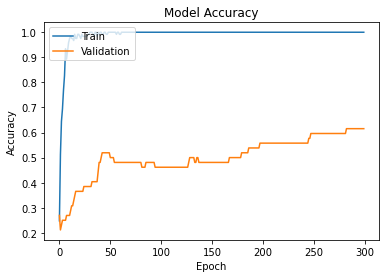

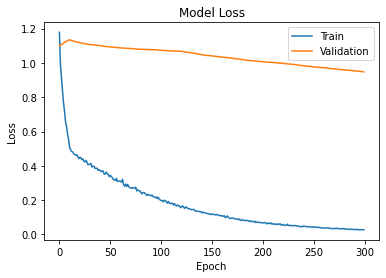

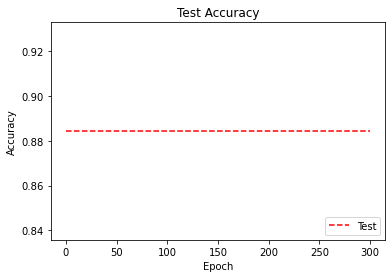

In [58]:
from sklearn.preprocessing import StandardScaler
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.callbacks import TensorBoard, ReduceLROnPlateau
from datetime import datetime
import matplotlib.pyplot as plt

# Define log directory for TensorBoard
log_dir = "logs/" + datetime.now().strftime("%Y%m%d-%H%M%S")

# Reshape train_data[0] to match the expected shape
reshaped_train_data = np.reshape(train_data[0], (-1, MAX_SEQ_LENGTH, NUM_FEATURES))

# Reshape test_data[0] to match the expected shape
reshaped_test_data = np.reshape(test_data[0], (-1, MAX_SEQ_LENGTH, NUM_FEATURES))

# Data Preprocessing
scaler = StandardScaler()
scaled_train_data = scaler.fit_transform(reshaped_train_data.reshape(-1, NUM_FEATURES)).reshape(
    reshaped_train_data.shape
)
scaled_test_data = scaler.transform(reshaped_test_data.reshape(-1, NUM_FEATURES)).reshape(
    reshaped_test_data.shape
)

# Utility for our sequence model
def get_sequence_model():
    class_vocab = label_processor.get_vocabulary()

    frame_features_input = keras.Input((MAX_SEQ_LENGTH, NUM_FEATURES))
    mask_input = keras.Input((MAX_SEQ_LENGTH,), dtype="bool")

    x = keras.layers.LSTM(256, return_sequences=True)(frame_features_input, mask=mask_input)
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.LSTM(512, return_sequences=True)(x)
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.LSTM(256, return_sequences=True)(x)
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.LSTM(128)(x)
    x = keras.layers.Dropout(0.2)(x)
    x = keras.layers.Dense(128, activation="relu")(x)
    x = keras.layers.Dense(64, activation="relu")(x)
    output = keras.layers.Dense(len(class_vocab), activation="softmax")(x)

    rnn_model = keras.Model([frame_features_input, mask_input], output)

    rnn_model.compile(loss="sparse_categorical_crossentropy", optimizer=keras.optimizers.Adam(learning_rate=0.0001), metrics=["accuracy"])
    return rnn_model

EPOCHS = 300

# Utility for running experiments
def run_experiment():
    filepath = "./tmp/video_classifier"
    checkpoint = keras.callbacks.ModelCheckpoint(
        filepath, save_weights_only=True, save_best_only=True, verbose=1
    )

    # Add TensorBoard callback
    tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)

    # Add ReduceLROnPlateau callback for learning rate schedule
    reduce_lr_callback = ReduceLROnPlateau(monitor="val_loss", factor=0.1, patience=10, min_lr=0.00001)

    seq_model = get_sequence_model()
    history = seq_model.fit(
        [scaled_train_data, train_data[1]],
        train_labels,
        validation_split=0.3,
        epochs=EPOCHS,
        callbacks=[checkpoint, tensorboard_callback, reduce_lr_callback],
    )

    seq_model.load_weights(filepath)
    _, accuracy = seq_model.evaluate([scaled_test_data, test_data[1]], test_labels)
    print(f"Test accuracy: {round(accuracy * 100, 2)}%")

    # Plot accuracy and loss curves
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(['Train', 'Validation'], loc='upper right')
    plt.show()
    
    # Plot test accuracy
    plt.plot([0, EPOCHS], [accuracy, accuracy], 'r--')
    plt.title('Test Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(['Test'], loc='lower right')
    plt.show()

    return history, seq_model

_, sequence_model = run_experiment()

In [74]:

%load_ext tensorboard

%tensorboard --logdir=C:\\Users\\hp\\logs

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6006 (pid 10032), started 4 days, 2:13:19 ago. (Use '!kill 10032' to kill it.)